### Worksheet to learn basic GIS tools using Python
Based on tutorial here: https://automating-gis-processes.github.io/CSC18/index.html

In [2]:
#Imports:
from shapely import geometry as shg
import shapely.speedups
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

#Embed matplotlib figures into notebooks:
%matplotlib inline  

Simple test data

In [3]:
#Create two points
p1 = shg.Point(24.952242, 60.1696017)
p2 = shg.Point(24.976567, 60.1612500)
print(p1,p2)

#Create a polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = shg.Polygon(coords)
print(poly)

POINT (24.952242 60.1696017) POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


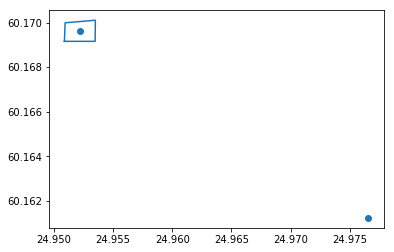

In [4]:
#Plot polygon and points:
X = [coords[i][0] for i in range(len(coords))]  #get list of x coords by looping 
Y = [coords[i][1] for i in range(len(coords))]
X.append(coords[0][0])             #repeat first point to close the polygon
Y.append(coords[0][1])

plt.plot(X,Y)                         #plot the polygon
plt.scatter((p1.x,p2.x),(p1.y,p2.y))  #plot the points
    


In [5]:
#Check if points are within the polygon:
print(p1.within(poly))
print(p2.within(poly))

#Get centroid and area of polygon:
print('centroid: ', poly.centroid)
print('area: ', poly.area)

True
False
centroid:  POINT (24.95224242849236 60.16960179038188)
area:  2.2847579999939037e-06


In [6]:
#Check if polygon contains points:
print(poly.contains(p1))
print(poly.contains(p2))

True
False


### Real data

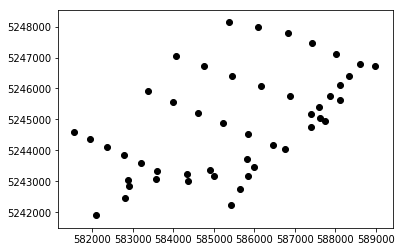

In [8]:
#Import point data:
points_file = 'nodes_all.csv'
df = pd.read_csv(points_file, header=1)                           #read data from csv
points = [shg.Point(df.loc[i].X, df.loc[i].Y) for i in df.index]  #create list of point objects by looping over points in df

#for p in points:
    #plt.scatter((p.x),(p.y),color='k')  #plot the points 
    
pts = [plt.scatter((p.x),(p.y),color='k') for p in points]

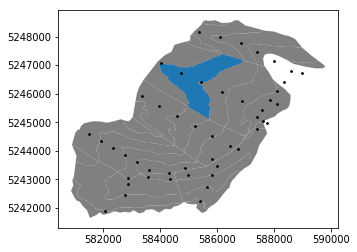

In [127]:
#Import polygons from shapefile:
poly_file = r'C:\Users\Chloe\Desktop\PhD\GIS maps\ArcMap files\subcatchments.shp' #path to subcatchment shapefile
polys = gpd.read_file(poly_file)                                                  #import shapefile

#Identify one specific subcatchment:
loc = polys['typ']==7
S = polys.loc[loc]

#Plot:
f,ax = plt.subplots()                   #create figure and axis objects
polys.plot(ax=ax, facecolor='gray')     #plot the polygons
S.plot(ax=ax)                          #plot selected sub-catchment
for p in points:
    plt.scatter((p.x),(p.y),color='k', s=3)  #plot the points

[False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[<shapely.geometry.point.Point object at 0x000001D253C53748>, <shapely.geometry.point.Point object at 0x000001D253C53BA8>]


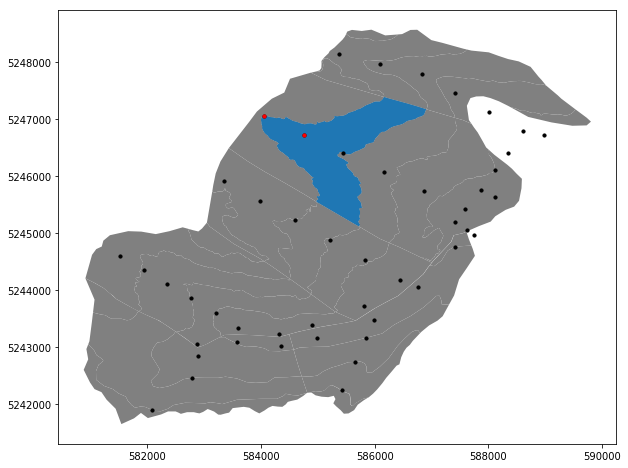

In [188]:
#Check which points are in selected polygon:
poly = S.iloc[0].geometry                                #get polygon info for desired polygon

#Create a mask (a True/False array):
pip_mask = [point.within(poly) for point in points]      #loop over each point and see if it is in polygon
print(pip_mask)

#Only store points if in polygon (pip=points in polygon):
pip = [point  for point in points if point.within(poly)]    #loop over each point and store it if it is in polygon
print(pip)

#Plot:
f,ax = plt.subplots(figsize=(10,10))                   #create figure and axis objects
polys.plot(ax=ax, facecolor='gray')     #plot the polygons
S.plot(ax=ax)                          #plot selected sub-catchment
for p in points:                             #loop over all points
    plt.scatter((p.x),(p.y),color='k', s=10)  #plot all points
for p in pip:                          #loop over points in polygon
    plt.scatter((p.x),(p.y),color='r', s=10)  #plot the points
